In [1]:
# uses https://cran.r-project.org/web/packages/phaseR/index.html
# based on tutorial https://stackoverflow.com/questions/75842745/sir-phase-plane-r

# install.packages(c('phaseR'))

We want to model
$$
\frac{d}{dt}
\begin{bmatrix}
\theta\\ \phi
\end{bmatrix}
= \begin{bmatrix}
\phi \\ -\omega_0^2 \sin\theta -2\gamma \phi
\end{bmatrix}
$$
where $\gamma=\frac12$ and $\omega_0=2$

In [2]:
full_dy_dt <- function(t, y, parms) {
    gamma <- parms[1]
    omega0 <- parms[2]
    y1 <- y[1]
    y2 <- y[2]
    list(c(
        y2,
        -omega0^2 * sin(y1) - 2* gamma *y2
    ))
}

In [3]:
# Solve the de
parameters <- c(1/2, 2)
steps <- seq(from=0, to=40, by=.1)

In [4]:
initials <- cbind(
    sapply( seq(from=-30, to=30, by=1), function(x) c(x, 15) ),
    sapply( seq(from=-30, to=30, by=1), function(x) c(x, -15) )
)
initials

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,] -30  -29  -28  -27  -26  -25  -24  -23  -22  -21   ⋯      21    22    23  
[2,]  15   15   15   15   15   15   15   15   15   15   ⋯     -15   -15   -15  
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,]  24    25    26    27    28    29    30  
[2,] -15   -15   -15   -15   -15   -15   -15

In [5]:
solutions <- sapply(seq_len(ncol(initials)), function(i) {
    # for each index, run desolve
    list(data.frame(deSolve::ode(c(initials[1, i], initials[2,i]), steps, full_dy_dt, parameters)))
})

In [6]:
head(solutions[[1]])

time X1        X2       
1 0.0  -30.00000 15.000000
2 0.1  -28.58985 13.279297
3 0.2  -27.32399 12.133597
4 0.3  -26.15118 11.338103
5 0.4  -25.06095 10.418645
6 0.5  -24.07701  9.226196

png 
  2

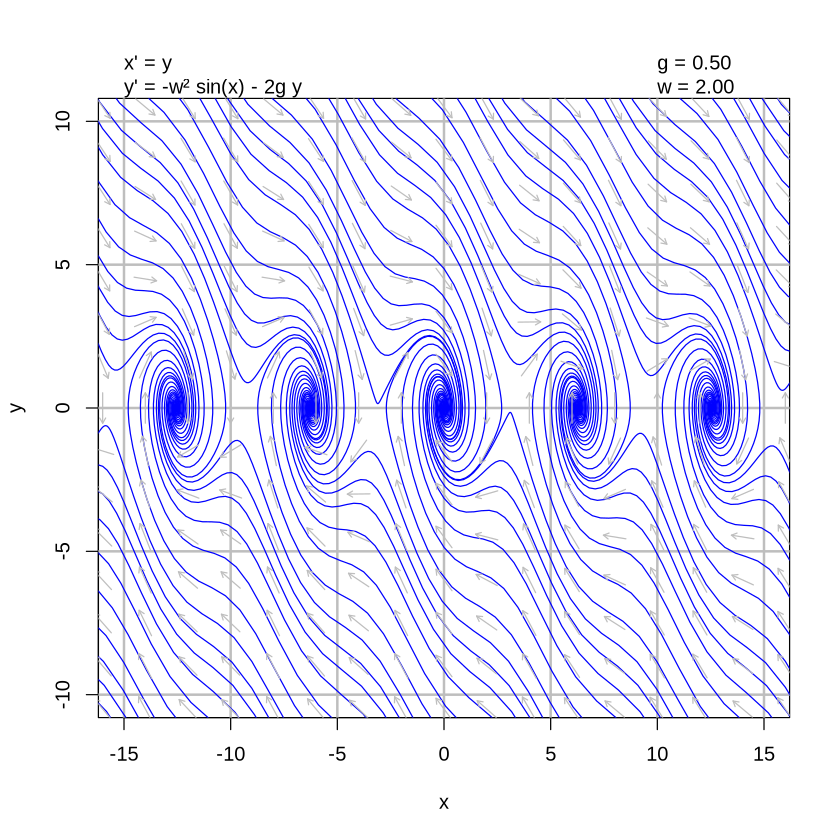

In [7]:
library(ggplot2)

plot(NULL, xlim=c(-15, 15), ylim=c(-10,10), xlab="x", ylab="y")
grid(lty=1, lwd=2, col="grey")
for (i in seq_len(ncol(initials))) {
    lines(solutions[[i]]$X1, solutions[[i]]$X2, col="blue")
}

flow <- phaseR::flowField(full_dy_dt, xlim=c(-20, 20), ylim=c(-15,15), parameters)

mtext(sprintf("x' = y"), side=3, at=-15, line=1, adj=0)
mtext(sprintf("y' = -w² sin(x) - 2g y"), side=3, at=-15, line=0, adj=0)

mtext(sprintf("g = %.2f", parameters[1]), side=3, at=10, line=1, adj=0)
mtext(sprintf("w = %.2f", parameters[2]), side=3, at=10, line=0, adj=0)

dev.print(png, "../images/pendulum-phase-full.png", width=600, height=600)

# Plot just spiral

png 
  2

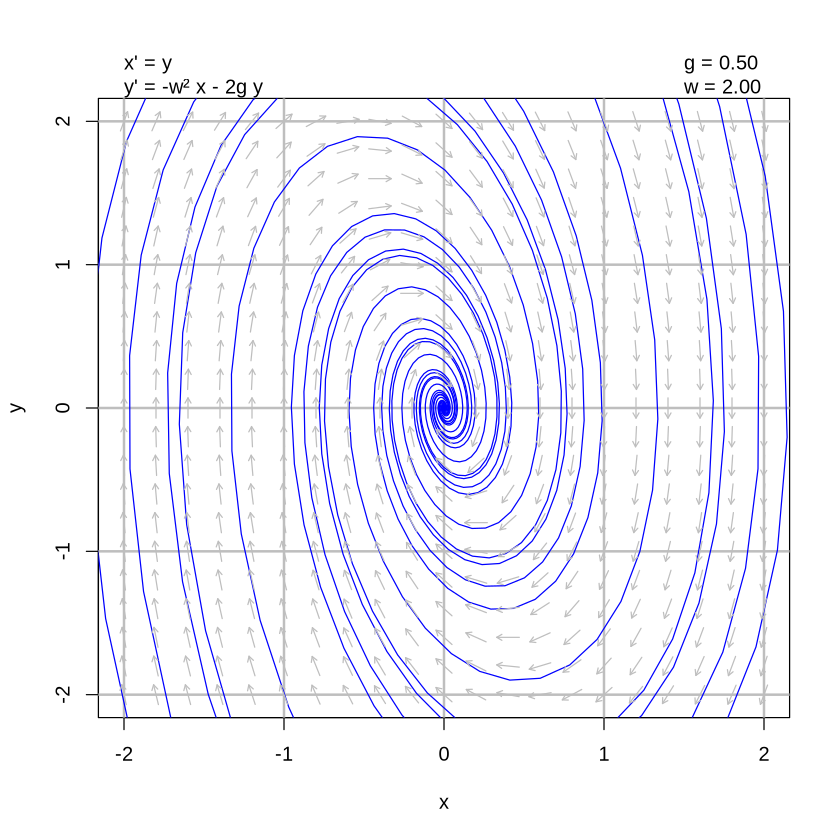

In [8]:
spiral_dy_dt <- function(t, y, parms) {
    gamma <- parms[1]
    omega0 <- parms[2]
    y1 <- y[1]
    y2 <- y[2]
    list(c(
        y2,
        -omega0^2 * y1 - 2* gamma *y2
    ))
}

spiral_initials <- cbind(
    sapply(seq(from=0, to=2*pi * 10/11, length.out=10), function(t) 10*c(cos(t), sin(t)))
)

spiral_solutions <- sapply(seq_len(ncol(spiral_initials)), function(i) {
    # for each index, run desolve
    list(data.frame(deSolve::ode(c(spiral_initials[1, i], spiral_initials[2,i]), steps, spiral_dy_dt, parameters)))
})

library(ggplot2)

plot(NULL, xlim=c(-2, 2), ylim=c(-2,2), xlab="x", ylab="y")
grid(lty=1, lwd=2, col="grey")
for (i in seq_len(ncol(spiral_initials))) {
    lines(spiral_solutions[[i]]$X1, spiral_solutions[[i]]$X2, col="blue")
}

flow <- phaseR::flowField(spiral_dy_dt, xlim=c(-2, 2), ylim=c(-2,2), parameters)

mtext(sprintf("x' = y"), side=3, at=-2, line=1, adj=0)
mtext(sprintf("y' = -w² x - 2g y"), side=3, at=-15, line=0, adj=0)

mtext(sprintf("g = %.2f", parameters[1]), side=3, at=1.5, line=1, adj=0)
mtext(sprintf("w = %.2f", parameters[2]), side=3, at=1.5, line=0, adj=0)

dev.print(png, "../images/pendulum-phase-linearized1.png", width=600, height=600)

In [9]:
# help(seq)